# Churn analysis with pycaret

On this project, we analyse churn using pycaret and try to predict it the most accurately possible. This code is divided into the following sessions:
- Data processing and ML models with pycaret setup
- Conclusions and sugestions

## Data analysis

In [1]:
import pandas as pd 
from pycaret.classification import *

df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


((10000, 14), None)

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Looking at the EstimatedSalary and Balance columns, we can see there is high standard deviations. 

One thing we can suppose is that a client which a small value of salary will not have a great value of balance. Let's take a closer look at the data by imposing some conditions on these two columns:

In [4]:
df.loc[(df['EstimatedSalary'] <= 1000) & (df['Balance'] >= 5000)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
396,397,15584766,Knight,557,France,Male,33,3,54503.55,1,1,1,371.05,0
925,926,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,933,15634141,Shephard,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
1139,1140,15569247,Mitchell,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1462,1463,15566211,Hsu,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1
1758,1759,15645544,Nekrasov,642,Germany,Female,30,5,129753.69,1,1,0,582.53,0
2046,2047,15733429,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
2723,2724,15681550,Lablanc,614,France,Female,41,8,121558.46,1,1,1,598.80,0


Clients with high salary and low balance are either fraud or an error. Either way, we will exclude these clients, since we have no further information about them. 

In [5]:
df = df.drop(df[(df['EstimatedSalary'] <= 1000) & (df['Balance'] >= 5000)].index)
df.shape

(9967, 14)

Let's now divide the dataset into data to train/validate the model and data unseen to test it, so we can better analyse the model predictions. This is easier to do when using pycaret, since we don't need to worry about preprocessing the two datasets we created. Pycaret does it for us.

In [52]:
#data sampling function
def data_sampling(dataset, frac: float, random_seed: int):
    data_sampled_1 = dataset.sample(frac=frac, random_state=random_seed)
    data_sampled_2 =  dataset.drop(data_sampled_1.index).reset_index(drop=True)
    data_sampled_1.reset_index(drop=True, inplace=True)
    return data_sampled_1, data_sampled_2

In [54]:
#separating into data and unseen data
data, data_unseen = data_sampling(df, 0.9, 42)
data.shape, data_unseen.shape

((8970, 14), (997, 14))

In [55]:
s = setup(data = data,
          target = 'Exited',
          train_size = 0.8,
          fold_strategy = 'kfold',
          fold_shuffle = True,
          ignore_low_variance=True,
          remove_multicollinearity = True,
          normalize = True,
          normalize_method = 'robust',
          data_split_stratify = True,
          ignore_features = ['RowNumber', 'CustomerId', 'Surname'],
          feature_selection= True,
          create_clusters= True,
          silent = True)


,Description,Value
0,session_id,365
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(8970, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


We use feature_selection to exclude any feature that is not importante and create_cluster to see if clustering the clients will results in better metric values. 

In [56]:
best = compare_models(sort='F1', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8664,0.8646,0.4973,0.7678,0.6029,0.5269,0.5454,2.3840
lightgbm,Light Gradient Boosting Machine,0.8616,0.8609,0.5026,0.7361,0.5962,0.5164,0.5308,0.3120
xgboost,Extreme Gradient Boosting,0.8579,0.8461,0.5047,0.7165,0.5912,0.5084,0.5205,0.4520
rf,Random Forest Classifier,0.8643,0.8521,0.4815,0.7676,0.5910,0.5148,0.5354,0.2960
gbc,Gradient Boosting Classifier,0.8633,0.8657,0.4767,0.7672,0.5871,0.5106,0.5319,0.4110
ada,Ada Boost Classifier,0.8517,0.8511,0.4782,0.7031,0.5678,0.4825,0.4964,0.1500
et,Extra Trees Classifier,0.8517,0.8335,0.4627,0.7113,0.5596,0.4753,0.4918,0.3050
lr,Logistic Regression,0.8452,0.8352,0.4047,0.7159,0.5163,0.4326,0.4579,1.0120
lda,Linear Discriminant Analysis,0.8418,0.8329,0.3992,0.6990,0.5072,0.4214,0.4455,0.0270
dt,Decision Tree Classifier,0.7906,0.6850,0.5060,0.4887,0.4953,0.3637,0.3649,0.0240


In [57]:
cat = tune_model(create_model('catboost'), choose_better = True, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8663,0.8809,0.5098,0.7879,0.6190,0.5424,0.5613
1,0.8691,0.8618,0.4857,0.7556,0.5913,0.5177,0.5356
2,0.8705,0.8813,0.5411,0.7524,0.6295,0.5535,0.5646
3,0.8552,0.8503,0.4886,0.8600,0.6232,0.5418,0.5750
4,0.8538,0.8970,0.4839,0.7500,0.5882,0.5043,0.5222
5,0.8816,0.8215,0.4786,0.7000,0.5685,0.5027,0.5149
6,0.8591,0.8654,0.4610,0.7222,0.5628,0.4836,0.5010
7,0.8745,0.8904,0.5035,0.7912,0.6154,0.5448,0.5646
8,0.8591,0.8669,0.4490,0.7674,0.5665,0.4892,0.5143
9,0.8563,0.8586,0.4600,0.7582,0.5726,0.4924,0.5147


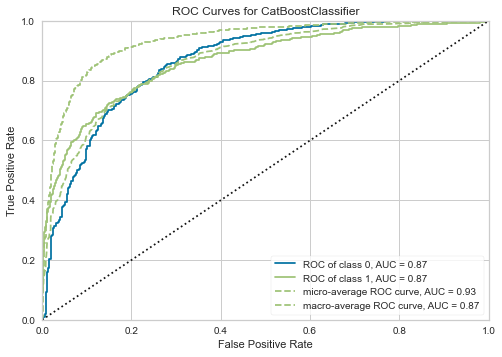

In [58]:
plot_model(cat, plot = 'auc')

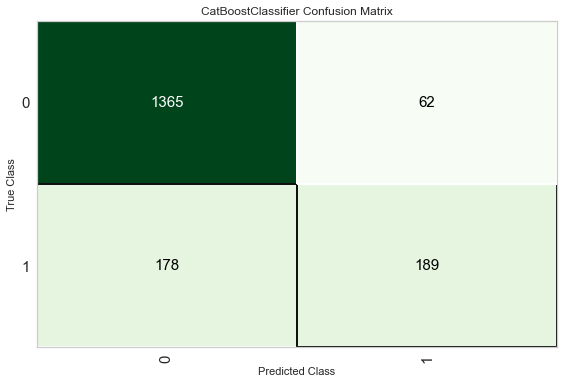

In [59]:
plot_model(cat, plot = 'confusion_matrix')

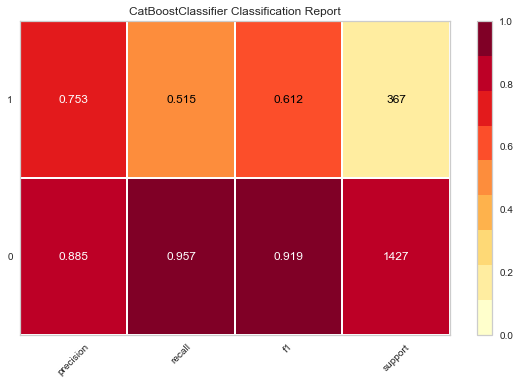

In [60]:
plot_model(cat, plot="class_report")

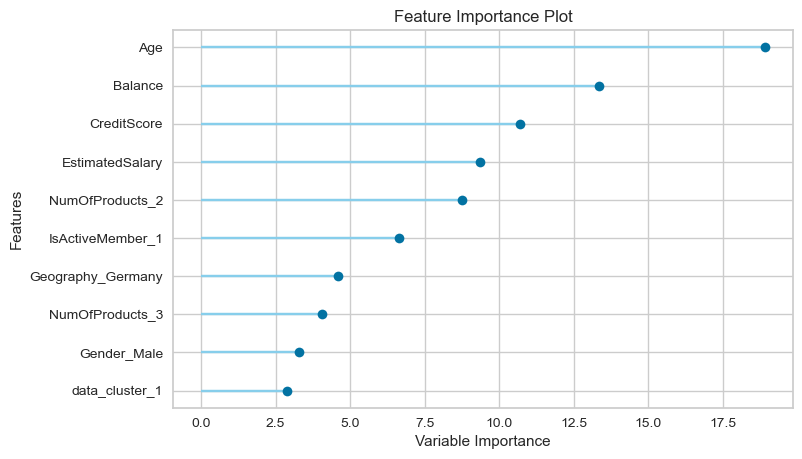

In [61]:
plot_model(cat, plot='feature')

In [62]:
#prediction on test data 

predict_model(cat);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8662,0.8661,0.5150,0.7530,0.6117,0.5343,0.5483


In [63]:
final_model = finalize_model(cat)

### Prediction on unseen data

In [68]:
predict_model(final_model, data=data_unseen)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
0,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.9401
1,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0.8191
2,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,0.9593
3,56,15760861,Phillipps,619,France,Male,43,1,125211.92,1,1,1,113410.49,0,0,0.8492
4,65,15592461,Jackson,603,Germany,Male,26,4,109166.37,1,1,1,92840.67,0,0,0.8424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,9978,15579969,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0,0,0.9822
993,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0,0,0.9122
994,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,0,0.7440
995,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,0.7297


## Conclusions

Pycaret gave us the best model, which is also catboost, with a F1 score slightly smaller than the one obtained in the churn code.